## What is Polynomial Regression?

### Polynomial Regression is a form of linear regression where we model the relationship between the independent variable `X` and dependent variable `y` as an **n-th degree polynomial**. Despite the curved fit, it's still considered "linear" because the coefficients (`θ`) are linear - the features themselves are nonlinear transformations.

## Why Use Polynomial Regression?

### When data shows a curved pattern, a straight line from simple linear regression won't fit well. Polynomial regression allows us to capture these curvatures while still using linear regression techniques.

## The Mathematical Form

- The polynomial regression model of degree `d` looks like:

### `y = θ₀ + θ₁x + θ₂x² + θ₃x³ + ... + θ_dx^d`


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [3]:
np.random.seed(42)

# generating a non linear data
m = 100
X = 6 * np.random.rand(100, 1) - 3  # np.random(100 nos. between 0 and 1)
# X values between -3 and 3
y = y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)  # y = 0.5x² + x + 2 + noise

print("Original data shape:", X.shape)
print("First 5 X values:", X[:5].flatten())
print("First 5 y values:", y[:5].flatten())

Original data shape: (100, 1)
First 5 X values: [-0.75275929  2.70428584  1.39196365  0.59195091 -2.06388816]
First 5 y values: [1.61761105 8.06185944 4.45250583 0.77958493 1.84625712]


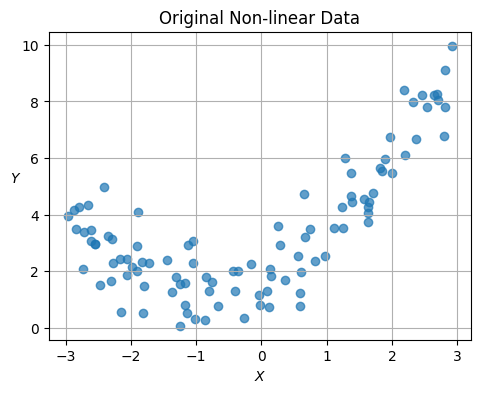

In [4]:
# plot the original data
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X, y, alpha=0.7)
plt.title("Original Non-linear Data")
plt.xlabel("$X$")
plt.ylabel("$Y$", rotation=0)
plt.grid(True)
plt.show()

### Polynomial Feature Transformation

- The key step: we transform our feature to include polynomial terms


In [ ]:
# create polynomial features (deg 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print("\nTransformed data shape:", X_poly.shape)
print("First instance - Original X:", X[0])
print("First instance - Transformed X_poly:", X_poly[0])  # with squared value
print("Feature names:", poly_features.get_feature_names_out())


Transformed data shape: (100, 2)
First instance - Original X: [-0.75275929]
First instance - Transformed X_poly: [-0.75275929  0.56664654]
Feature names: ['x0' 'x0^2']


In [6]:
# now teain a regular linear regression on the transformed features

# train lin_reg on poly features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# get the model parameters
print(f"Intercept (θ₀): {lin_reg.intercept_[0]:.6f}")
print(f"Coefficients: {lin_reg.coef_.flatten()}")

# ŷ = 1.781346 + 0.93366893*x + 0.56456263*x²
# final --> ŷ =  1.781346 + 0.93366893*(-0.75275929) + 0.56456263*(0.56664654)

Intercept (θ₀): 1.781346
Coefficients: [0.93366893 0.56456263]


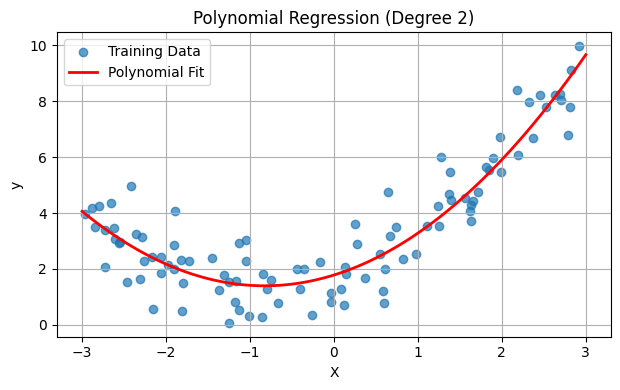

In [8]:
# make predictions
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
# generated sample random X_new --> X_new_poly[0] = [-3.0, 9.0] --> [x, x²]
y_new = lin_reg.predict(X_new_poly)

# results
plt.figure(figsize=(12, 4))
plt.subplot(122)
plt.scatter(X, y, alpha=0.7, label="Training Data")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Polynomial Fit")
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Understanding the Combinatorial Explosion

When you have multiple features, PolynomialFeatures creates interactions between them

- The combinatorial explosion formula:
- `Number of features = (n + d)! / (d! × n!)`

Where:

- `n` = original number of features
- `d` = polynomial degree


In [9]:
# example with 2 features
X_multi = np.array([[2, 3], [1, 4]])
print("\nOriginal 2-feature data:")
print(X_multi)

poly_multi = PolynomialFeatures(degree=2, include_bias=False)
X_multi_poly = poly_multi.fit_transform(X_multi)

print("Transformed 2-feature data (degree 2):")
print(X_multi_poly)
print("Feature names:", poly_multi.get_feature_names_out())

# for degree=3 with 2 features, we get even more terms
poly_multi_3 = PolynomialFeatures(degree=3, include_bias=False)
X_multi_poly_3 = poly_multi_3.fit_transform(X_multi)
print("\nFeature names for degree 3:", poly_multi_3.get_feature_names_out())


Original 2-feature data:
[[2 3]
 [1 4]]
Transformed 2-feature data (degree 2):
[[ 2.  3.  4.  6.  9.]
 [ 1.  4.  1.  4. 16.]]
Feature names: ['x0' 'x1' 'x0^2' 'x0 x1' 'x1^2']

Feature names for degree 3: ['x0' 'x1' 'x0^2' 'x0 x1' 'x1^2' 'x0^3' 'x0^2 x1' 'x0 x1^2' 'x1^3']


Mean Squared Error: 0.7772
Simple Linear Regression MSE: 3.0246


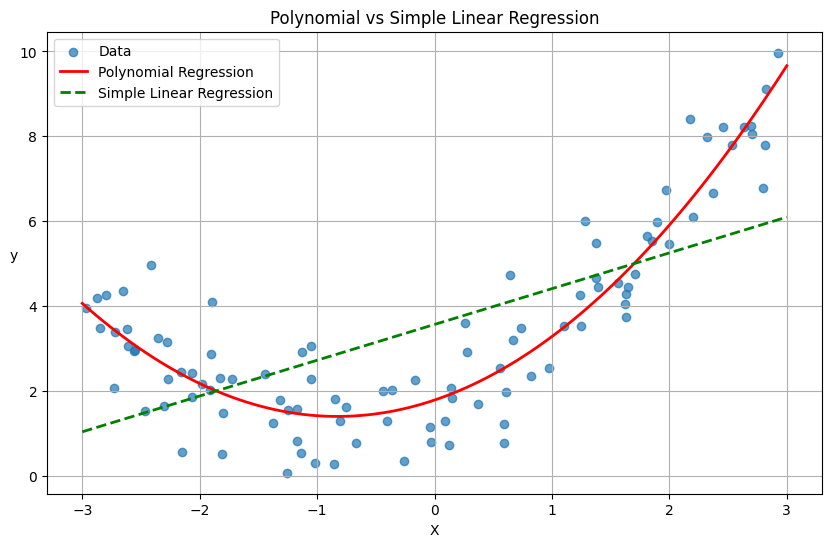

In [12]:
# complete example
from sklearn.metrics import mean_squared_error

# Evaluate
y_pred = lin_reg.predict(X_poly)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# compare with simple linear regression
lin_reg_simple = LinearRegression()
lin_reg_simple.fit(X, y)
y_pred_simple = lin_reg_simple.predict(X)
mse_simple = mean_squared_error(y, y_pred_simple)
print(f"Simple Linear Regression MSE: {mse_simple:.4f}")

# comparision plotting
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot = lin_reg.predict(X_plot_poly)
y_plot_simple = lin_reg_simple.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label="Data")
plt.plot(X_plot, y_plot, "r-", linewidth=2, label="Polynomial Regression")
plt.plot(X_plot, y_plot_simple, "g--", linewidth=2, label="Simple Linear Regression")
plt.title("Polynomial vs Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("y", rotation=0)
plt.legend()
plt.grid(True)
plt.show()

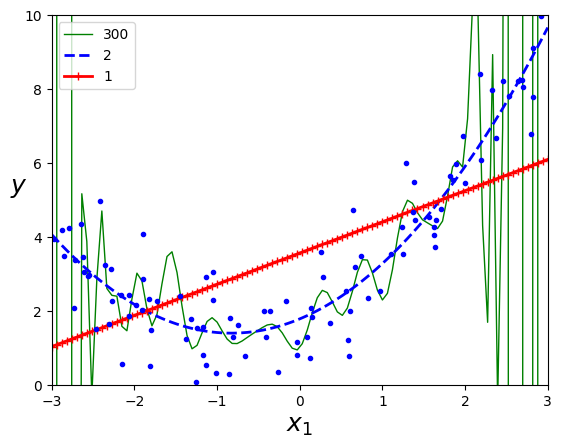

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline(
        [
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ]
    )
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

- If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression. For example, the above plot applies a 300-degree polynomial model to the preceding training data, and compares the result with a pure linear model and quadratic model (second-degree polynomial). Notice how the 300-degree polynomial model wiggles around to get as close as possible to the training instances.

- This high-degree Polynomial Regression model is severely overfitting the training data, while the linear model is underfitting it. The model that will generalize best in this case is the quadratic model, which makes sense because the data was generated using a quadratic model. But in general you won’t know what function generated the data, so how can you decide how complex your model should be? How can you tell that your model is overfitting or underfitting the data?